# Results - Regression on Real-world Data

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/berni-lehner/structural_health_monitoring/blob/main/notebooks/mixed_regression_results.ipynb)

## Prerequisites

In [1]:
import sys
import os
import time
import glob
from pathlib import Path
import sklearn
import pandas as pd
import numpy as np
from collections import Counter

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets


# initialize environment, paths, etc...
IN_COLAB = 'google.colab' in sys.modules

if(IN_COLAB):
    # uncomment in case you want to start from scratch in Colab
    !rm -rf /content/structural_health_monitoring  
    !git clone https://github.com/berni-lehner/structural_health_monitoring.git
    !pip install -r /content/structural_health_monitoring/requirements.txt
    
    # this is Colab specific, and only a manual "Run all" will cause the
    # installation to be finished
    if(pd.__version__ != '1.4.2'):
      print('Stopping RUNTIME! Please run again to finish installation.')
      os.kill(os.getpid(), 9)

    DATA_PATH = Path(r"/content/structural_health_monitoring/data")
    sys.path.insert(0, "/content/structural_health_monitoring/src")
else:
    DATA_PATH = Path(r"../data/")
    sys.path.insert(0,"../src")
    
    
sys.path.insert(0, DATA_PATH)
SYN_DATA_PATH = Path(DATA_PATH, "synthetic")
REAL_DATA_PATH = Path(DATA_PATH, "real_world")
RESULT_PATH = Path(DATA_PATH, "results")
if not os.path.isdir(RESULT_PATH):
    os.makedirs(RESULT_PATH)

try:
    from zippeekiyay import namelist
except ImportError or ModuleNotFoundError:
    print('installing zippee-ki-yay...')
    !pip install git+https://github.com/berni-lehner/zippee-ki-yay.git

    from zippeekiyay import namelist

CALIBRATION_FILE = Path(REAL_DATA_PATH, "calibration.pkl")

In [2]:
from plot_utils import (
    init_plotting,
    plot_metrics,
    plot_metrics_bar,
    get_metrics_summary,
    plot_cv_indices)

# configure fonts, etc...
init_plotting()

from scoring_utils import (
    get_synth_regression_scoring,
    SHM_Scoring)

from bench_utils import extract_metrics

In [3]:
RESULT_PATH = Path(r"../data/results/")

if not os.path.isdir(RESULT_PATH):
    os.makedirs(RESULT_PATH)

In [4]:
shm_scoring = SHM_Scoring()

## Data Loading

In [5]:
result_file = "mixed_regression_AA_baseline.pkl"
result_file = Path(RESULT_PATH, result_file)

syn_reg_baseline = pd.read_pickle(result_file)

In [6]:
result_file = "mixed_regression_AB.pkl"
result_file = Path(RESULT_PATH, result_file)

syn_reg = pd.read_pickle(result_file)

In [7]:
syn_reg.head()

,fit_time,score_time,test_r2 avg,test_neg_mean_squared_error avg,test_r2_0.0,test_r2_1.5,test_r2_2.5,test_r2_3.5,test_r2_4.5,test_r2_5.5,...,test_abs_err_23.0,test_abs_err_25.0,test_abs_err_27.0,test_abs_err_29.0,test_abs_err_31.0,test_abs_err_33.0,test_abs_err_35.0,test_abs_err_37.0,test_abs_err_39.0,test_abs_err_40.0
0,0.005984,0.166554,0.989370,-1.691333,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.374369,1.374369,1.374369,1.0,1.374369,1.374369,1.374369,1.0,0.0
1,0.005983,0.168552,0.989239,-1.712178,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.374369,1.374369,1.374369,1.0,1.374369,1.374369,1.374369,1.0,0.0
2,0.004986,0.162566,0.989380,-1.689733,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.374369,1.374369,1.374369,1.0,1.374369,1.374369,1.374369,1.0,0.0
3,0.007978,0.164560,0.989239,-1.712178,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.374369,1.374369,1.374369,1.0,1.374369,1.374369,1.374369,1.0,0.0
4,0.006980,0.167552,0.989374,-1.690667,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.374369,1.374369,1.374369,1.0,1.374369,1.374369,1.374369,1.0,0.0


### Combine results from baseline and our models

In [8]:
results = pd.concat([syn_reg_baseline[syn_reg_baseline['model'] == 'BASE_0'],
                     syn_reg[syn_reg['model'] == 'KNN_1'],
                     syn_reg[syn_reg['model'] == 'SVR'],
                     syn_reg[syn_reg['model'] == 'MLP_48'],
                     syn_reg[syn_reg['model'] == 'MLP_64.32']],
                     ignore_index=True)

In [9]:
# source columns
mse_individual = ['test_mse_0.0'] + shm_scoring.REAL_MSE_RESULTS
mse_individual

['test_mse_0.0',
 'test_mse_1.5',
 'test_mse_2.5',
 'test_mse_3.5',
 'test_mse_4.5',
 'test_mse_5.5',
 'test_mse_7.0',
 'test_mse_8.0',
 'test_mse_10.0',
 'test_mse_12.0',
 'test_mse_14.0',
 'test_mse_16.0',
 'test_mse_17.0',
 'test_mse_19.0',
 'test_mse_21.0',
 'test_mse_23.0',
 'test_mse_25.0',
 'test_mse_27.0',
 'test_mse_29.0',
 'test_mse_31.0',
 'test_mse_33.0',
 'test_mse_35.0',
 'test_mse_37.0',
 'test_mse_39.0',
 'test_mse_40.0']

In [10]:
# target columns
mse_contr_individual = [item.replace('test_mse_', 'mse_contr_') for item in mse_individual]
mse_contr_individual

['mse_contr_0.0',
 'mse_contr_1.5',
 'mse_contr_2.5',
 'mse_contr_3.5',
 'mse_contr_4.5',
 'mse_contr_5.5',
 'mse_contr_7.0',
 'mse_contr_8.0',
 'mse_contr_10.0',
 'mse_contr_12.0',
 'mse_contr_14.0',
 'mse_contr_16.0',
 'mse_contr_17.0',
 'mse_contr_19.0',
 'mse_contr_21.0',
 'mse_contr_23.0',
 'mse_contr_25.0',
 'mse_contr_27.0',
 'mse_contr_29.0',
 'mse_contr_31.0',
 'mse_contr_33.0',
 'mse_contr_35.0',
 'mse_contr_37.0',
 'mse_contr_39.0',
 'mse_contr_40.0']

In [11]:
full_mse = results[mse_individual].sum(axis=1)/len(mse_individual)

for col in results[mse_individual]:
    tmp = results[col]*100/len(mse_individual)/full_mse
    results[col.replace('test_mse_', 'mse_contr_')] = tmp
    
# sanity check, all contributions have to sum up to 100% every time for each defect
assert results[mse_contr_individual].sum(axis=1).sum()/len(results)==100

## Plot MSE

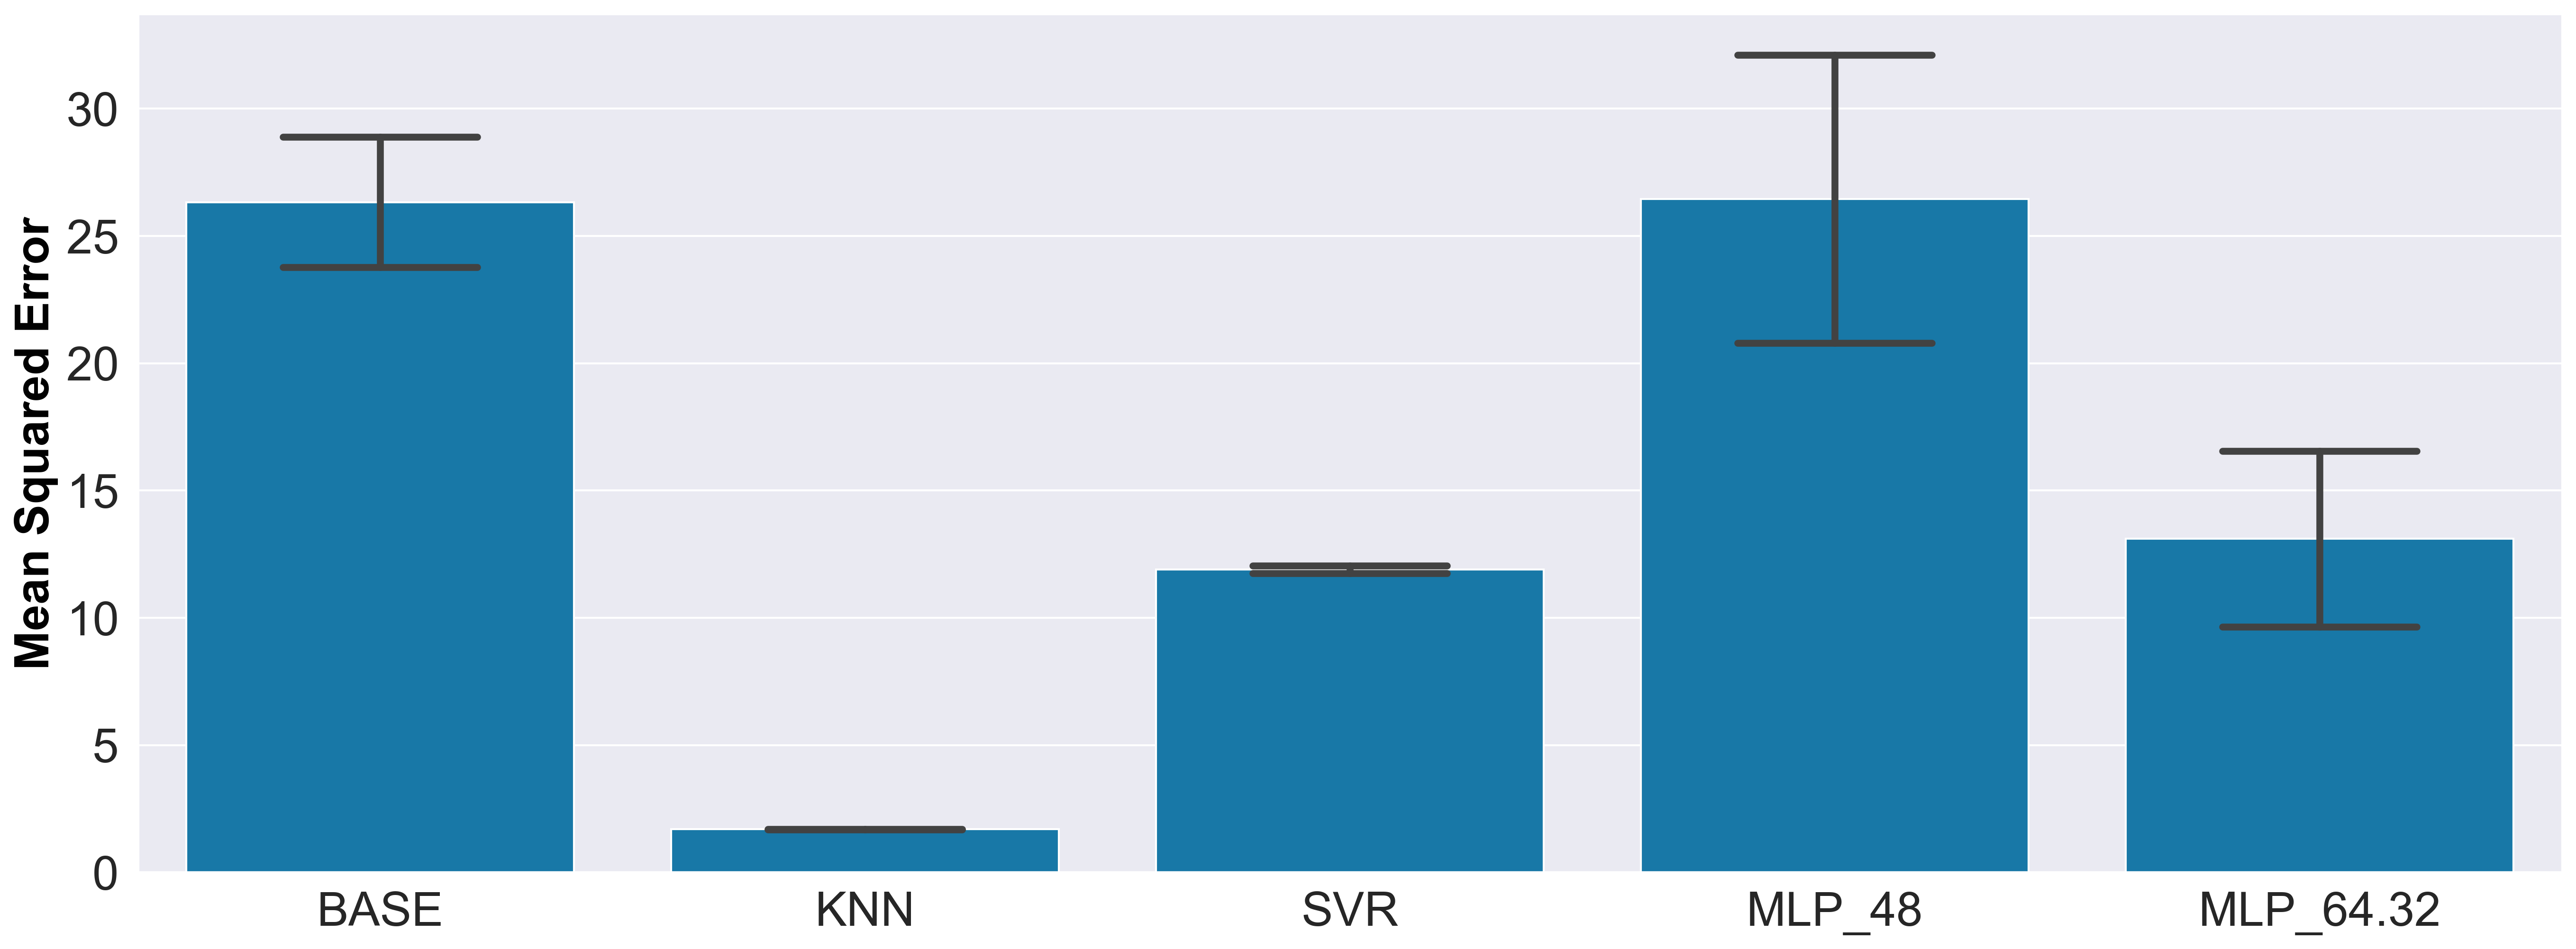

In [12]:
axis_font = {#'family': 'Times',
        'color':  'black',
        'weight': 'bold',
        'size': 24,
        }

fig = plot_metrics_bar(extract_metrics(results, ['test_mse_0.0_40.0']),
                       palette='winter',
                       errwidth=3.5,
                       capsize=.4)

plt.ylabel('Mean Squared Error', fontdict=axis_font)
plt.xlabel('')
fig.get_legend().remove()

labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = 'BASE'
labels[1] = 'KNN'
plt.gca().set_xticklabels(labels)

fname = Path(RESULT_PATH, r"mixed_regr_mse.pdf")
plt.savefig(fname, bbox_inches='tight')
plt.show()

## Plot MSE wrt Defect Size

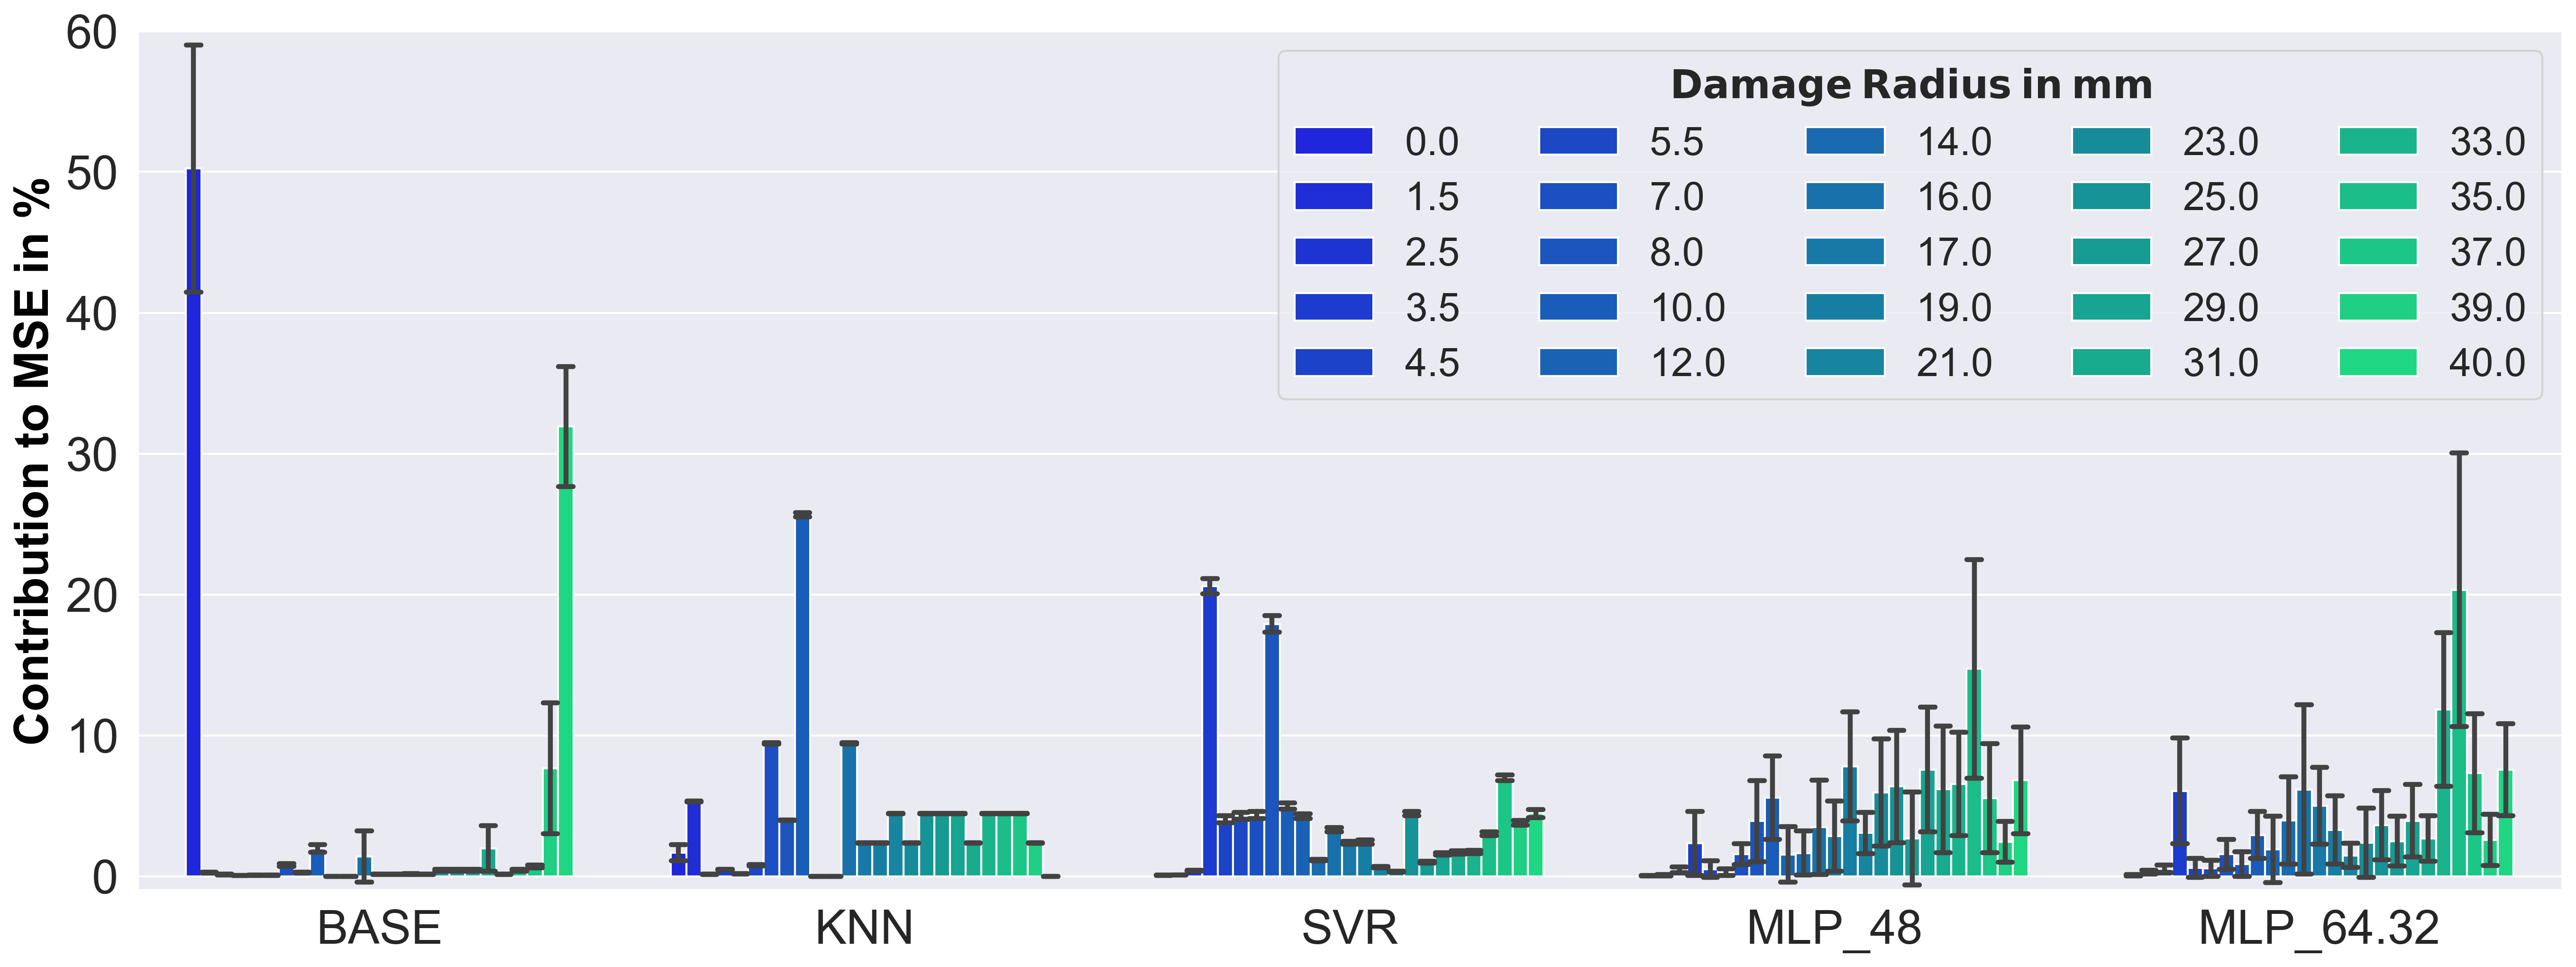

In [13]:
fig = plot_metrics_bar(extract_metrics(results, mse_contr_individual),
                       palette='winter',
                       errwidth=2.5,
                       capsize=.03)

plt.ylim((-1,60))
plt.ylabel('Contribution to MSE in %', fontdict=axis_font)
plt.xlabel('')

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [item.replace('mse_contr_', '') for item in labels]
plt.legend(handles, new_labels, ncol=5, loc='best',
           title="$\\bf{Damage \:Radius} \:in\:mm$",
           title_fontsize=20, fontsize=20)

labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = 'BASE'
labels[1] = 'KNN'
plt.gca().set_xticklabels(labels)


fname = Path(RESULT_PATH, r"mixed_regr_mse_individual_contribution.pdf")
plt.savefig(fname, bbox_inches='tight')
plt.show()

In [14]:
df = extract_metrics(results, ['test_mse_0.0_40.0'])

print(get_metrics_summary(df))

                                  mean       std
model     metrics                               
BASE_0    test_mse_0.0_40.0  26.329156  2.604709
KNN_1     test_mse_0.0_40.0   1.696993  0.010430
MLP_48    test_mse_0.0_40.0  26.457740  5.748910
MLP_64.32 test_mse_0.0_40.0  13.103773  3.506078
SVR       test_mse_0.0_40.0  11.896190  0.149974


In [15]:
df = extract_metrics(results, ['score_time'])

df.info()

print(get_metrics_summary(df))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 160 to 319
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   model    160 non-null    object 
 1   metrics  160 non-null    object 
 2   values   160 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.0+ KB
                          mean       std
model     metrics                       
BASE_0    score_time  0.293303  0.016847
KNN_1     score_time  0.132926  0.019569
MLP_48    score_time  0.015895  0.002100
MLP_64.32 score_time  0.016176  0.001650
SVR       score_time  0.169298  0.009113
